In [1]:
#tabular data imports :
import pandas as pd
import numpy as np
import env
from env import user, password, host
from pydataset import data

# visualization imports:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# success metrics from earlier in the week: mean squared error and r^2 explained variance
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

#stats
from scipy.stats import pearsonr, spearmanr
from scipy.stats import shapiro

import warnings
warnings.filterwarnings("ignore")
import wrangle as w
import os
directory = os.getcwd()
pd.set_option('display.max_columns', None)

## Exercises

#### Sourcing the Zillow database as the data source, create a jupyter notebook named `explore_zillow` and do the following:

- 1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?
     - Q1. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?
     - Q2. Is logerror significantly different for yearbuilt?
     - Q3. Is logerror significantly different for properties in different zipcodes?
     - Q4. Is logerror significantly different for properties with higher sqft?
     - Q5. Is logerror significantly different for properties with higher tax_value?
- 2. Answer those questions through a mix of statistical tests and visualizations.

In [2]:
df = w.prep_zillow(w.get_zillow_data())
df.head(3)

parcelid  bathrooms  bedrooms  deck_type  sqft county  fireplacecnt  \
id                                                                        
20  11324547        2.0         4          0  3633     LA           0.0   
33  11585547        2.0         3          0  2077     LA           0.0   
62  11954547        0.0         0          0  1200     LA           0.0   

    garage_cnt  hot_tub_spa    latitude    longitude  lot_sqft  poolcnt  \
id                                                                        
20         0.0          0.0  34560018.0 -118169806.0    9826.0        0   
33         0.0          0.0  34012977.0 -118479243.0    6490.0        0   
62         0.0          0.0  34097714.0 -118248712.0    4054.0        0   

   county_code  propertylandusetypeid  city_id  zipcode  yearbuilt  \
id                                                                   
20        0100                  261.0    40227  97329.0       2005   
33        0100                  261.0    26964  96152.0       1926   
62        0109                  261.0    12447  96020.0       1972   

    numberofstories  tax_structure  tax_value  tax_land  taxamount  log_error  \
id                                                                              
20              1.0       222321.0     296425   74104.0    6941.39   0.042463   
33              1.0       210192.0     646760  436568.0    7924.68  -0.040807   
62              1.0          595.0       5328    4733.0      91.60   0.069858   

     tran_date      propertylandusedesc.1  
id                                         
20  2017-01-02  Single Family Residential  
33  2017-01-02  Single Family Residential  
62  2017-01-02  Single Family Residential

In [3]:
w.summarize(df)

--------------------------------
--------------------------------
Information on DataFrame: 
Shape of Dataframe: (54503, 26)
--------------------------------
Basic DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 54503 entries, 20 to 77611
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   parcelid               54503 non-null  int64  
 1   bathrooms              54503 non-null  float64
 2   bedrooms               54503 non-null  int64  
 3   deck_type              54503 non-null  int64  
 4   sqft                   54503 non-null  int64  
 5   county                 54503 non-null  object 
 6   fireplacecnt           54503 non-null  float64
 7   garage_cnt             54503 non-null  float64
 8   hot_tub_spa            54503 non-null  float64
 9   latitude               54503 non-null  float64
 10  longitude              54503 non-null  float64
 11  lot_sqft               54503 

In [4]:
df = df.drop(columns = ['propertylandusedesc.1','county_code','tran_date'])
df.head(3)

parcelid  bathrooms  bedrooms  deck_type  sqft county  fireplacecnt  \
id                                                                        
20  11324547        2.0         4          0  3633     LA           0.0   
33  11585547        2.0         3          0  2077     LA           0.0   
62  11954547        0.0         0          0  1200     LA           0.0   

    garage_cnt  hot_tub_spa    latitude    longitude  lot_sqft  poolcnt  \
id                                                                        
20         0.0          0.0  34560018.0 -118169806.0    9826.0        0   
33         0.0          0.0  34012977.0 -118479243.0    6490.0        0   
62         0.0          0.0  34097714.0 -118248712.0    4054.0        0   

    propertylandusetypeid  city_id  zipcode  yearbuilt  numberofstories  \
id                                                                        
20                  261.0    40227  97329.0       2005              1.0   
33                  261.0    26964  96152.0       1926              1.0   
62                  261.0    12447  96020.0       1972              1.0   

    tax_structure  tax_value  tax_land  taxamount  log_error  
id                                                            
20       222321.0     296425   74104.0    6941.39   0.042463  
33       210192.0     646760  436568.0    7924.68  -0.040807  
62          595.0       5328    4733.0      91.60   0.069858

In [5]:
w.summarize(df)

--------------------------------
--------------------------------
Information on DataFrame: 
Shape of Dataframe: (54503, 23)
--------------------------------
Basic DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 54503 entries, 20 to 77611
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   parcelid               54503 non-null  int64  
 1   bathrooms              54503 non-null  float64
 2   bedrooms               54503 non-null  int64  
 3   deck_type              54503 non-null  int64  
 4   sqft                   54503 non-null  int64  
 5   county                 54503 non-null  object 
 6   fireplacecnt           54503 non-null  float64
 7   garage_cnt             54503 non-null  float64
 8   hot_tub_spa            54503 non-null  float64
 9   latitude               54503 non-null  float64
 10  longitude              54503 non-null  float64
 11  lot_sqft               54503 

In [6]:
df.columns

Index(['parcelid', 'bathrooms', 'bedrooms', 'deck_type', 'sqft', 'county',
       'fireplacecnt', 'garage_cnt', 'hot_tub_spa', 'latitude', 'longitude',
       'lot_sqft', 'poolcnt', 'propertylandusetypeid', 'city_id', 'zipcode',
       'yearbuilt', 'numberofstories', 'tax_structure', 'tax_value',
       'tax_land', 'taxamount', 'log_error'],
      dtype='object')

In [7]:
# Calculate q1, q3 and iqr for sqft

q1 = df.sqft.quantile(0.25)
q3 = df.sqft.quantile(0.75)
iqr = q3 - q1
k = 1.5

# calculate upper and lower ranges
upper_bound_sqft =  q3 + k * iqr
lower_bound_sqft =  q1 - k * iqr

lower_bound_sqft, upper_bound_sqft

(-150.0, 3610.0)

In [8]:
# Filter out rows where sqft is greater than upper_bound_sqft
df = df[df.sqft <= upper_bound_sqft]

# Now df contains only the rows where sqft is within the specified bounds
df.shape

(52020, 23)

In [9]:
# Calculate q1, q3 and iqr for tax_value

q1 = df.tax_value.quantile(0.25)
q3 = df.tax_value.quantile(0.75)
iqr = q3 - q1
k = 1.5

# calculate upper and lower ranges
upper_bound_tax_value =  q3 + k * iqr
lower_bound_tax_value =  q1 - k * iqr

lower_bound_tax_value, upper_bound_tax_value

(-292500.0, 967500.0)

In [10]:
# Filter out rows where sqft is greater than upper_bound_sqft
df = df[df.tax_value <= upper_bound_tax_value]

# Now df contains only the rows where tax_value is within the specified bounds
df.shape

(49638, 23)

## Splitting

In [11]:
train, validate, test = w.split_data(df)


    train -> (29782, 23)
    validate -> (9928, 23)
    test -> (9928, 23)


In [12]:
train.head(3)

parcelid  bathrooms  bedrooms  deck_type  sqft  county  fireplacecnt  \
id                                                                            
61569  10881957        2.0         3          0  1517      LA           0.0   
40792  14018965        3.0         5          0  2790  Orange           0.0   
73331  14426947        2.0         3          0  1803  Orange           0.0   

       garage_cnt  hot_tub_spa    latitude    longitude  lot_sqft  poolcnt  \
id                                                                           
61569         0.0          0.0  34196492.0 -118410992.0    6197.0        0   
40792         2.0          0.0  33688115.0 -117929813.0    6000.0        0   
73331         2.0          0.0  33489765.0 -117671030.0    4192.0        0   

       propertylandusetypeid  city_id  zipcode  yearbuilt  numberofstories  \
id                                                                           
61569                  261.0    12447  96450.0       1951              1.0   
40792                  261.0    38032  96958.0       1960              1.0   
73331                  261.0    33840  96985.0       2001              1.0   

       tax_structure  tax_value  tax_land  taxamount  log_error  
id                                                               
61569        64687.0      94066   29379.0    1184.18   0.009354  
40792       221010.0     893420  672410.0    9955.78   0.035691  
73331       232370.0     649760  417390.0    6752.72  -0.029797

In [13]:
cat_cols, num_cols = [], []
for col in train.columns:
    if train[col].dtype == 'O':
        cat_cols.append(col)
    else:
        if train[col].nunique() < 10:
            cat_cols.append(col)
        else:
            num_cols.append(col)

In [14]:
num_cols

['parcelid',
 'bathrooms',
 'bedrooms',
 'sqft',
 'latitude',
 'longitude',
 'lot_sqft',
 'city_id',
 'zipcode',
 'yearbuilt',
 'tax_structure',
 'tax_value',
 'tax_land',
 'taxamount',
 'log_error']

Distribution of parcelid


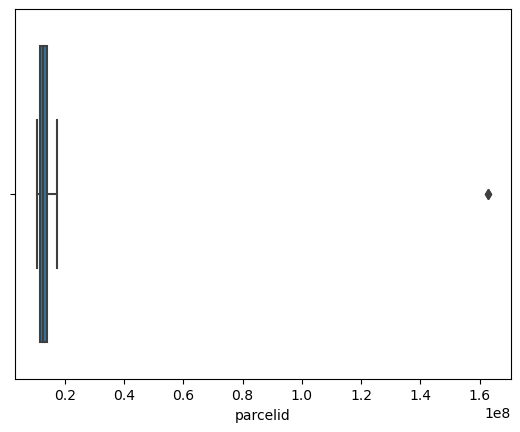

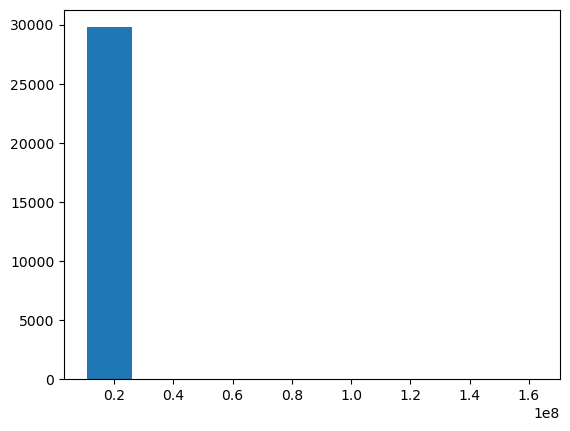

count    2.978200e+04
mean     1.293822e+07
std      2.124094e+06
min      1.071174e+07
25%      1.154402e+07
50%      1.258379e+07
75%      1.405112e+07
max      1.629608e+08
Name: parcelid, dtype: float64
Distribution of bathrooms


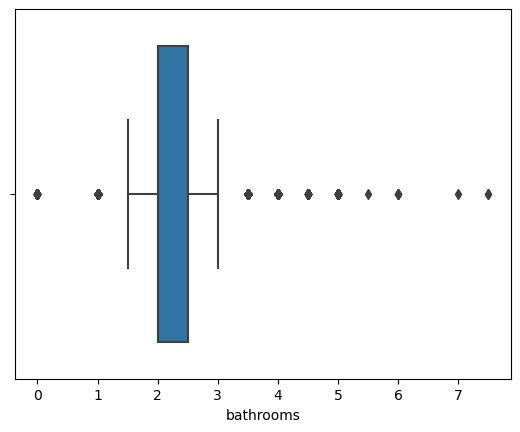

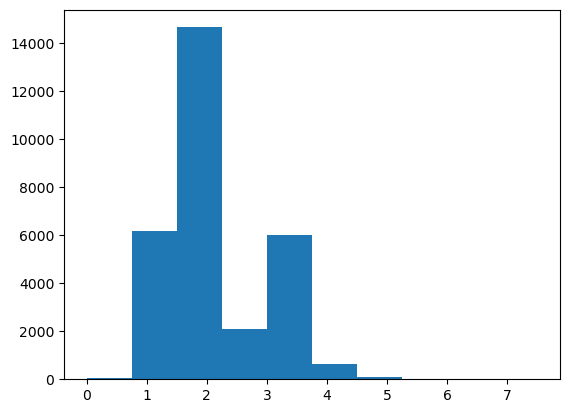

count    29782.000000
mean         2.077043
std          0.751200
min          0.000000
25%          2.000000
50%          2.000000
75%          2.500000
max          7.500000
Name: bathrooms, dtype: float64
Distribution of bedrooms


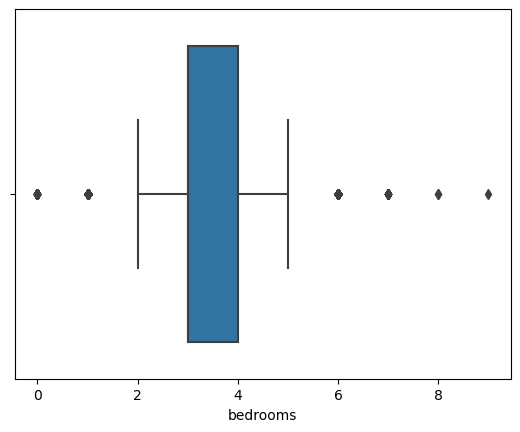

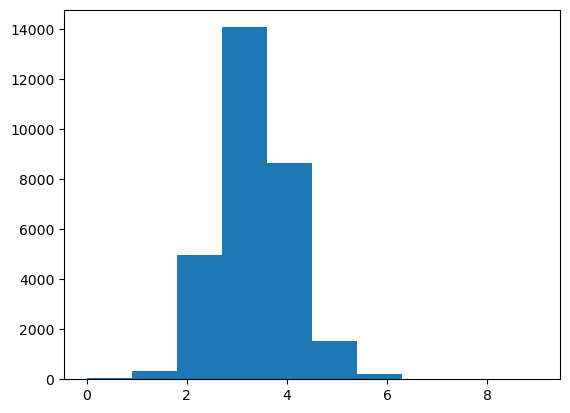

count    29782.000000
mean         3.219461
std          0.864742
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          9.000000
Name: bedrooms, dtype: float64
Distribution of sqft


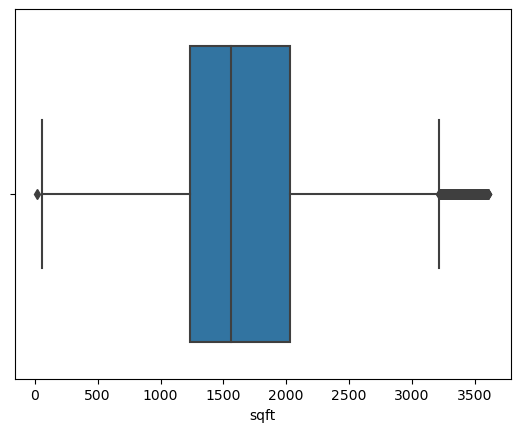

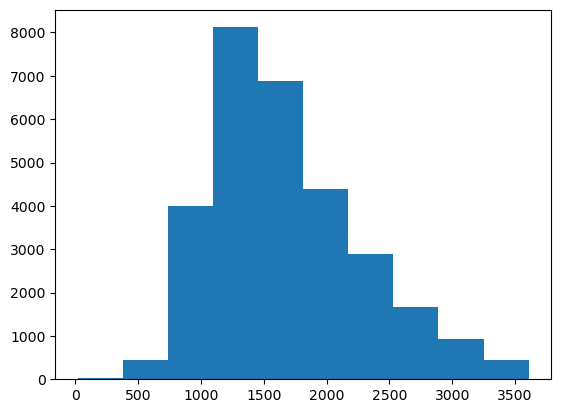

count    29782.000000
mean      1675.546672
std        598.791082
min         20.000000
25%       1232.000000
50%       1561.000000
75%       2026.000000
max       3608.000000
Name: sqft, dtype: float64
Distribution of latitude


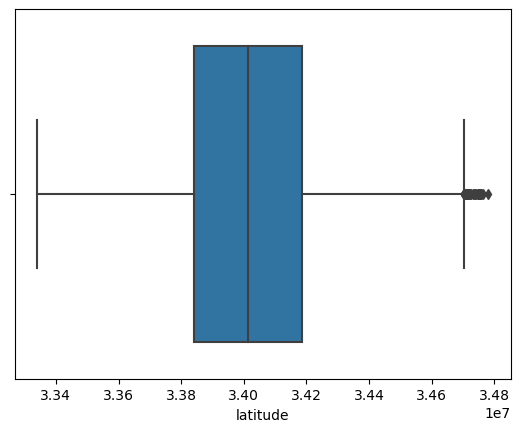

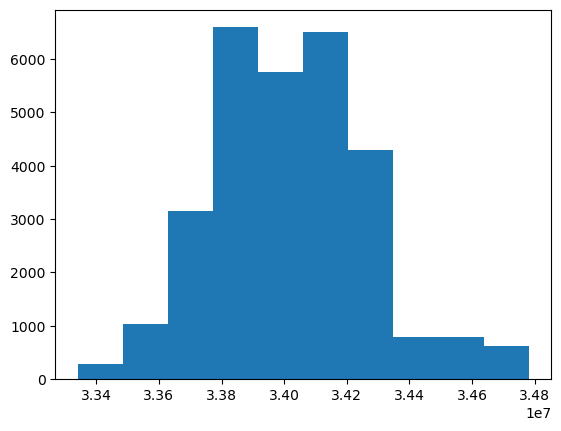

count    2.978200e+04
mean     3.402015e+07
std      2.461095e+05
min      3.334089e+07
25%      3.384192e+07
50%      3.401426e+07
75%      3.418610e+07
max      3.478064e+07
Name: latitude, dtype: float64
Distribution of longitude


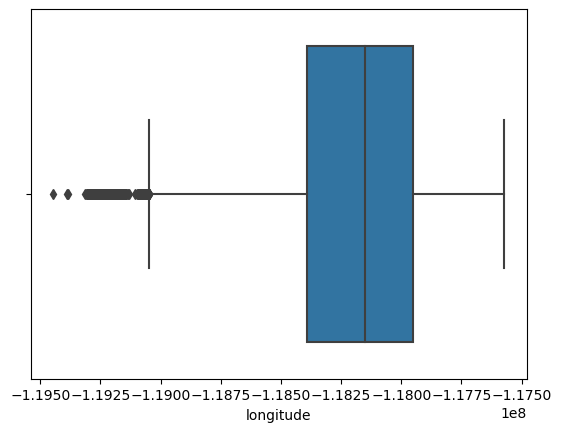

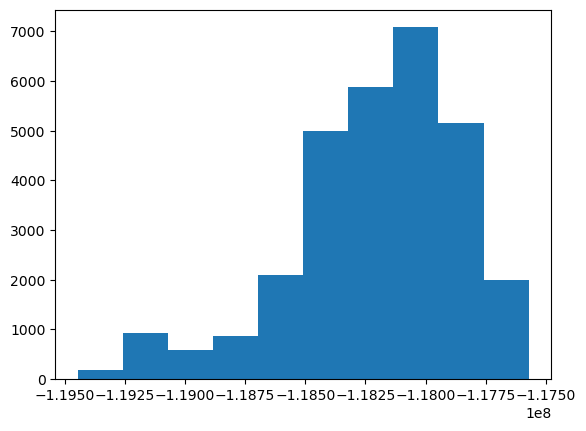

count    2.978200e+04
mean    -1.182043e+08
std      3.505227e+05
min     -1.194452e+08
25%     -1.183907e+08
50%     -1.181515e+08
75%     -1.179529e+08
max     -1.175721e+08
Name: longitude, dtype: float64
Distribution of lot_sqft


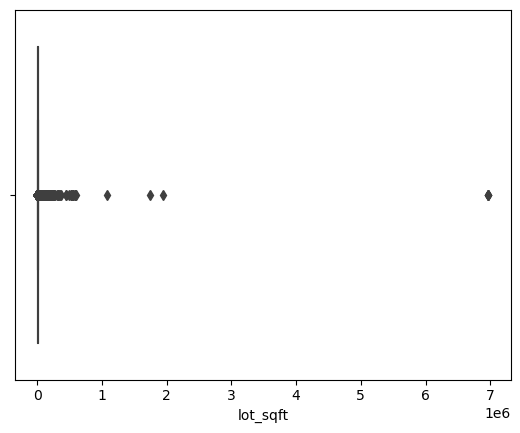

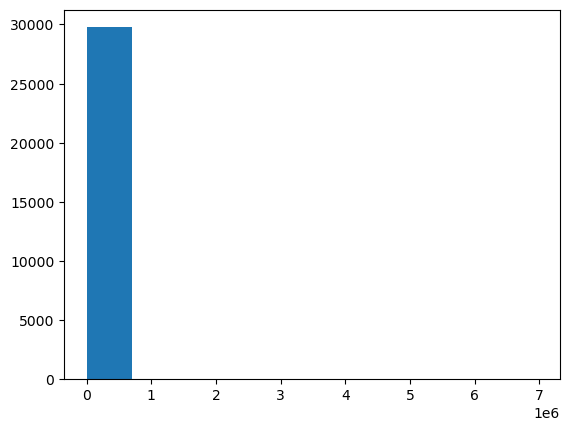

count    2.978200e+04
mean     9.854711e+03
std      8.387698e+04
min      1.690000e+02
25%      5.600000e+03
50%      6.688000e+03
75%      8.125000e+03
max      6.971010e+06
Name: lot_sqft, dtype: float64
Distribution of city_id


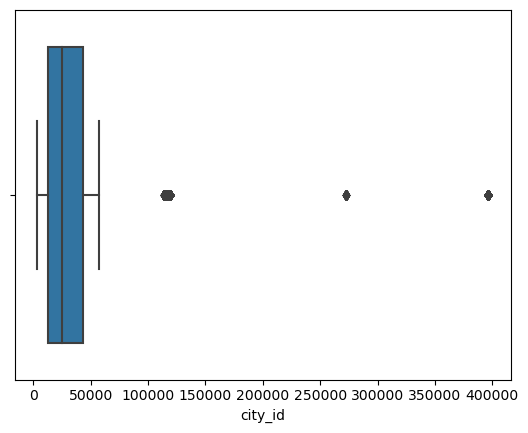

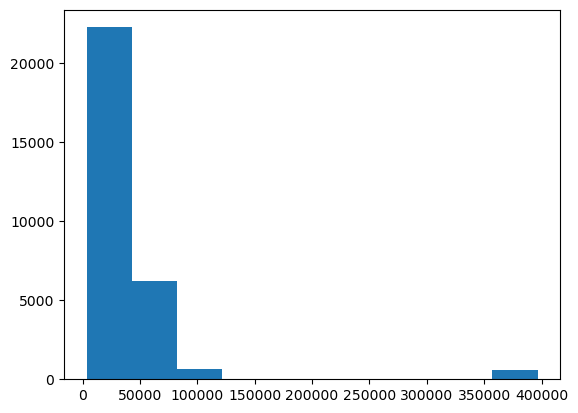

count     29782.000000
mean      35987.265462
std       55945.387597
min        3491.000000
25%       12447.000000
50%       24832.000000
75%       42967.000000
max      396556.000000
Name: city_id, dtype: float64
Distribution of zipcode


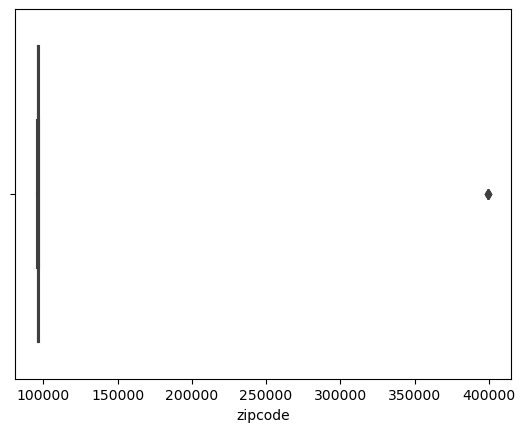

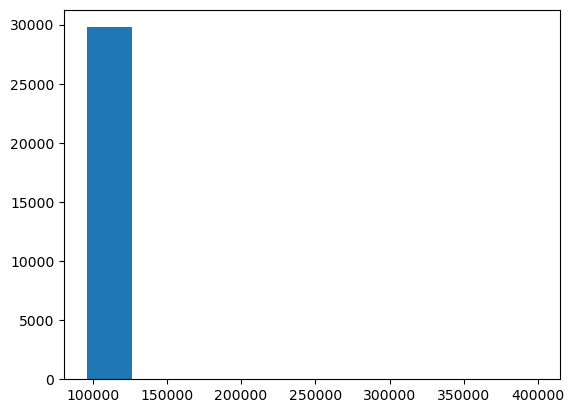

count     29782.000000
mean      96579.356692
std        3536.167922
min       95982.000000
25%       96203.000000
50%       96398.000000
75%       96990.000000
max      399675.000000
Name: zipcode, dtype: float64
Distribution of yearbuilt


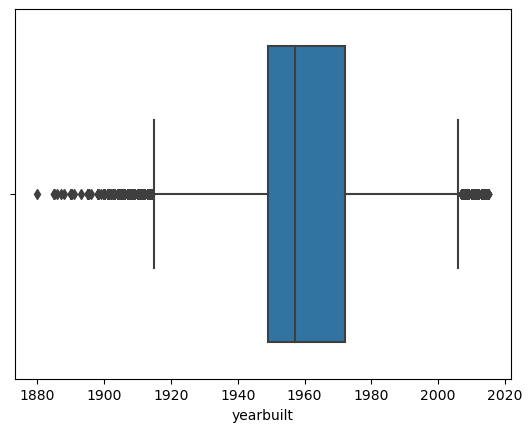

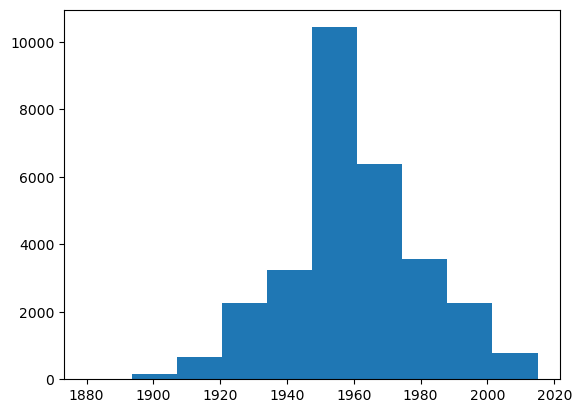

count    29782.000000
mean      1959.532100
std         20.498047
min       1880.000000
25%       1949.000000
50%       1957.000000
75%       1972.000000
max       2015.000000
Name: yearbuilt, dtype: float64
Distribution of tax_structure


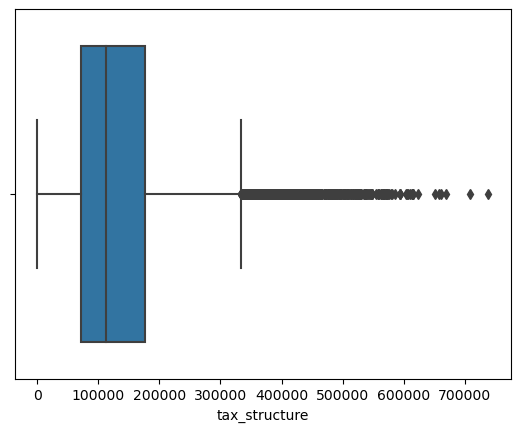

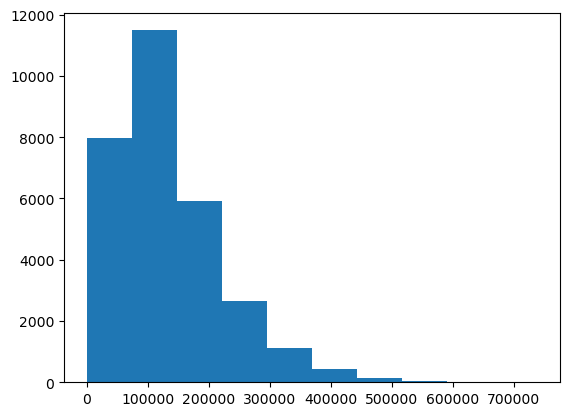

count     29782.000000
mean     133834.904137
std       88339.668842
min           5.000000
25%       70858.500000
50%      113030.000000
75%      176172.750000
max      738826.000000
Name: tax_structure, dtype: float64
Distribution of tax_value


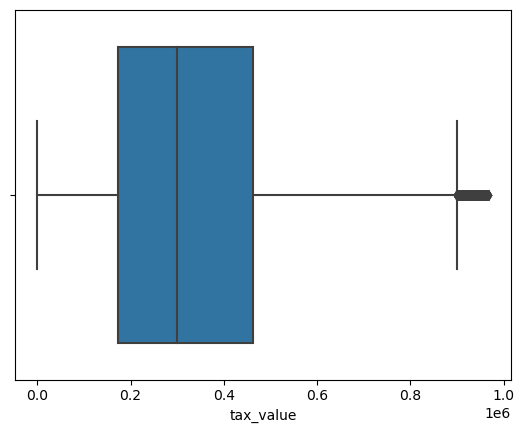

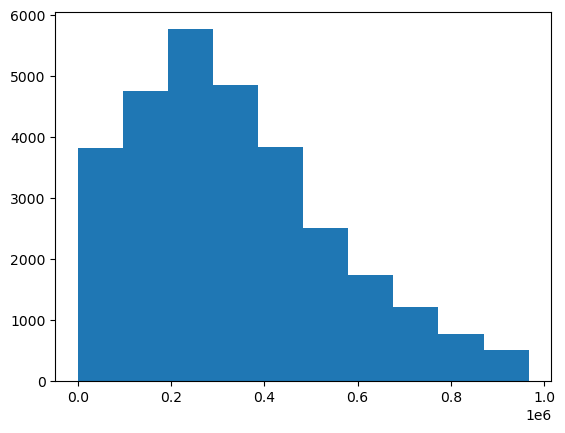

count     29782.000000
mean     336495.214190
std      211446.868611
min           9.000000
25%      172572.000000
50%      299645.000000
75%      463422.000000
max      967099.000000
Name: tax_value, dtype: float64
Distribution of tax_land


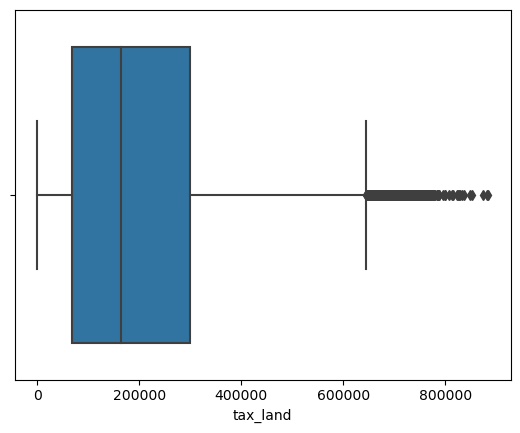

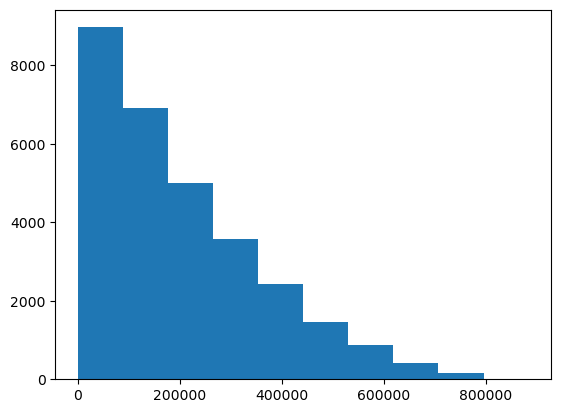

count     29782.000000
mean     202660.310053
std      162194.905907
min           4.000000
25%       67277.500000
50%      163342.500000
75%      298498.750000
max      884645.000000
Name: tax_land, dtype: float64
Distribution of taxamount


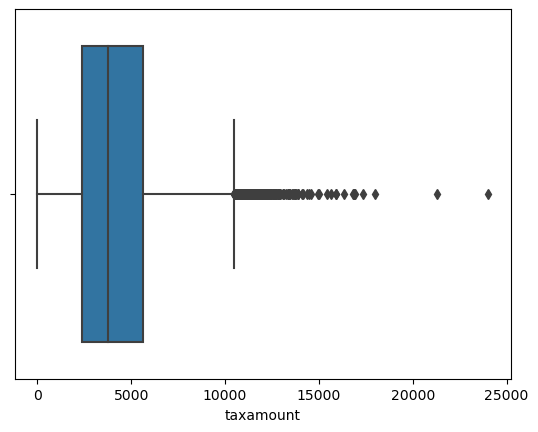

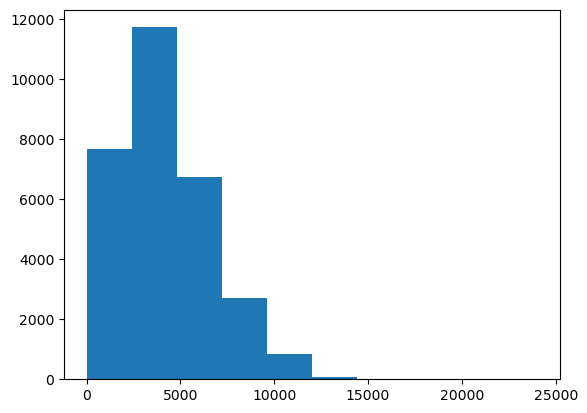

count    29782.000000
mean      4176.470551
std       2440.426666
min          1.000000
25%       2350.712500
50%       3784.165000
75%       5608.590000
max      24028.780000
Name: taxamount, dtype: float64
Distribution of log_error


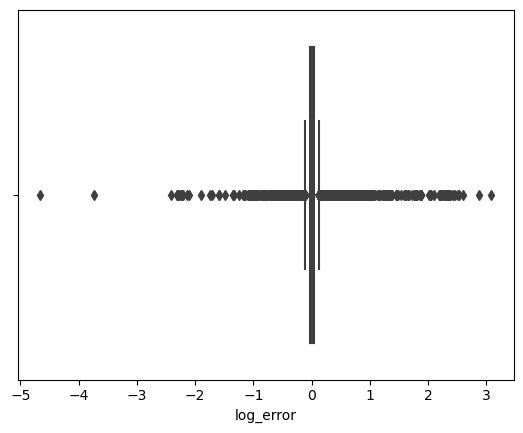

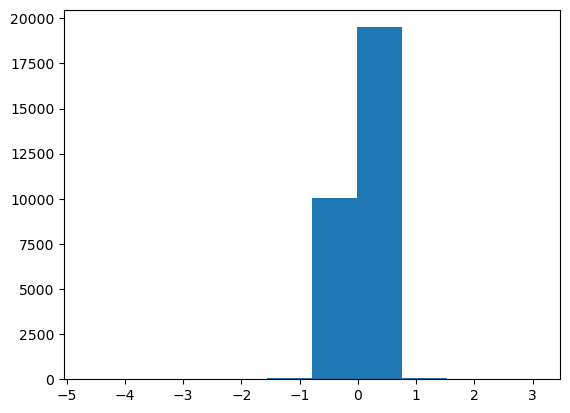

count    29782.000000
mean         0.015677
std          0.168354
min         -4.655420
25%         -0.024554
50%          0.006817
75%          0.039028
max          3.084717
Name: log_error, dtype: float64


In [15]:
for col in num_cols:
    # print out a report header with the column name
    print(f'Distribution of {col}')
    # present a box plot of the information
    # (gives good info about where outliers sit)
    sns.boxplot(data=train, x=col)
    plt.show()
    # present a histogram
    # histogram will establish how Normal our distribution is
    plt.hist(train[col])
    plt.show()
    print(train[col].describe())
    print('===================')

In [16]:
cat_cols

['deck_type',
 'county',
 'fireplacecnt',
 'garage_cnt',
 'hot_tub_spa',
 'poolcnt',
 'propertylandusetypeid',
 'numberofstories']

Distribution of deck_type
Axes(0.125,0.11;0.775x0.77)


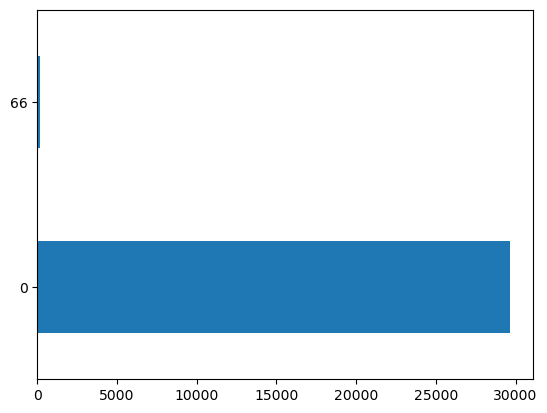

count    29782.000000
mean         0.305822
std          4.482345
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         66.000000
Name: deck_type, dtype: float64
Distribution of county
Axes(0.125,0.11;0.775x0.77)


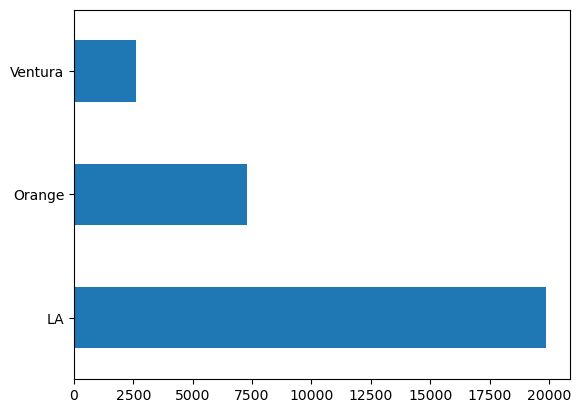

count     29782
unique        3
top          LA
freq      19888
Name: county, dtype: object
Distribution of fireplacecnt
Axes(0.125,0.11;0.775x0.77)


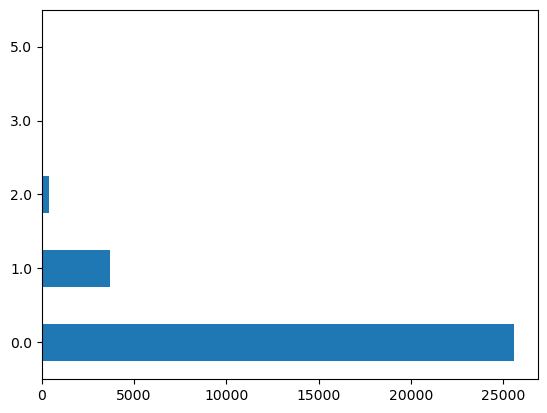

count    29782.000000
mean         0.157780
std          0.413807
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: fireplacecnt, dtype: float64
Distribution of garage_cnt
Axes(0.125,0.11;0.775x0.77)


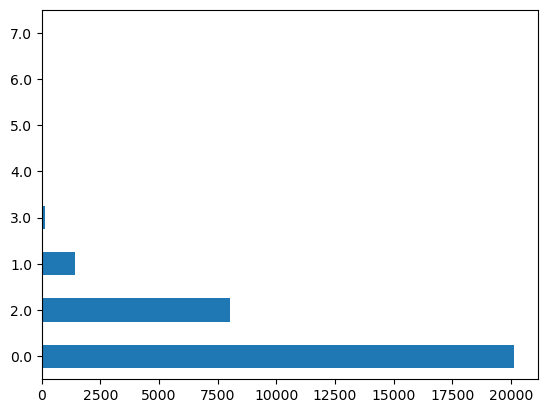

count    29782.000000
mean         0.609395
std          0.913636
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max          7.000000
Name: garage_cnt, dtype: float64
Distribution of hot_tub_spa
Axes(0.125,0.11;0.775x0.77)


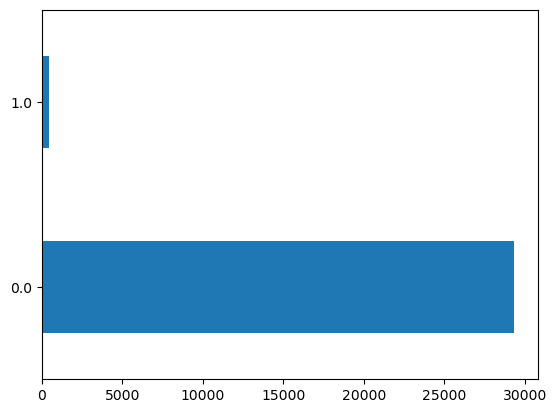

count    29782.000000
mean         0.014640
std          0.120108
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: hot_tub_spa, dtype: float64
Distribution of poolcnt
Axes(0.125,0.11;0.775x0.77)


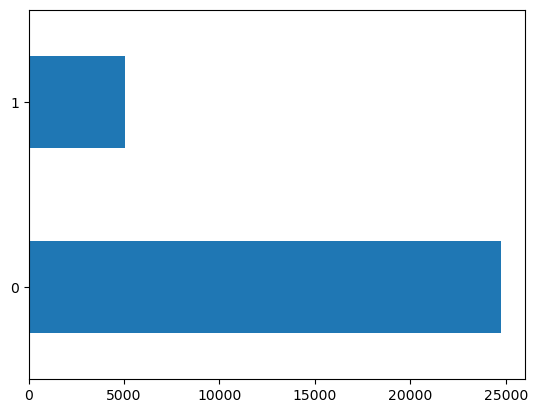

count    29782.000000
mean         0.169095
std          0.374842
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: poolcnt, dtype: float64
Distribution of propertylandusetypeid
Axes(0.125,0.11;0.775x0.77)


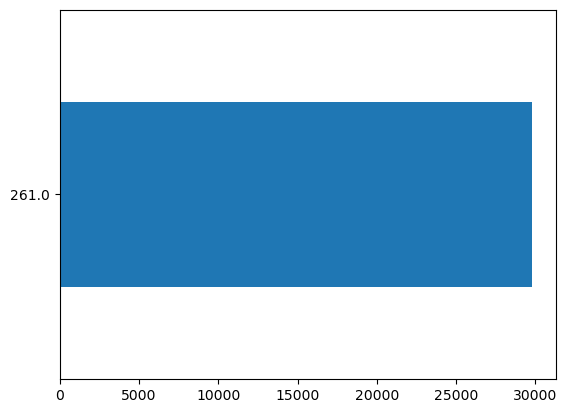

count    29782.0
mean       261.0
std          0.0
min        261.0
25%        261.0
50%        261.0
75%        261.0
max        261.0
Name: propertylandusetypeid, dtype: float64
Distribution of numberofstories
Axes(0.125,0.11;0.775x0.77)


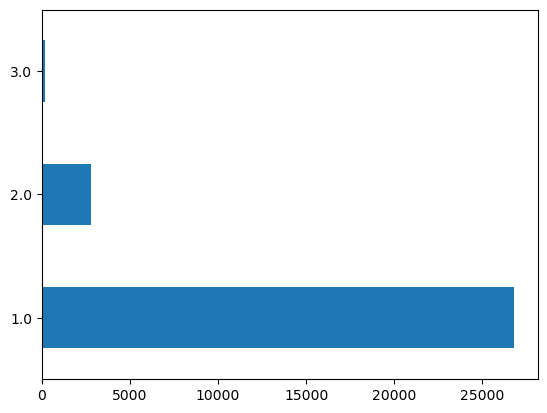

count    29782.000000
mean         1.106239
std          0.327995
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: numberofstories, dtype: float64


In [17]:
for col in cat_cols:
    # print out a report header with the column name
    print(f'Distribution of {col}')
    # present a bar chart
    # bar chart will establish how Normal our distribution is
    print(train[col].value_counts().plot.barh())
    plt.show()
    print(train[col].describe())
    print('===================')

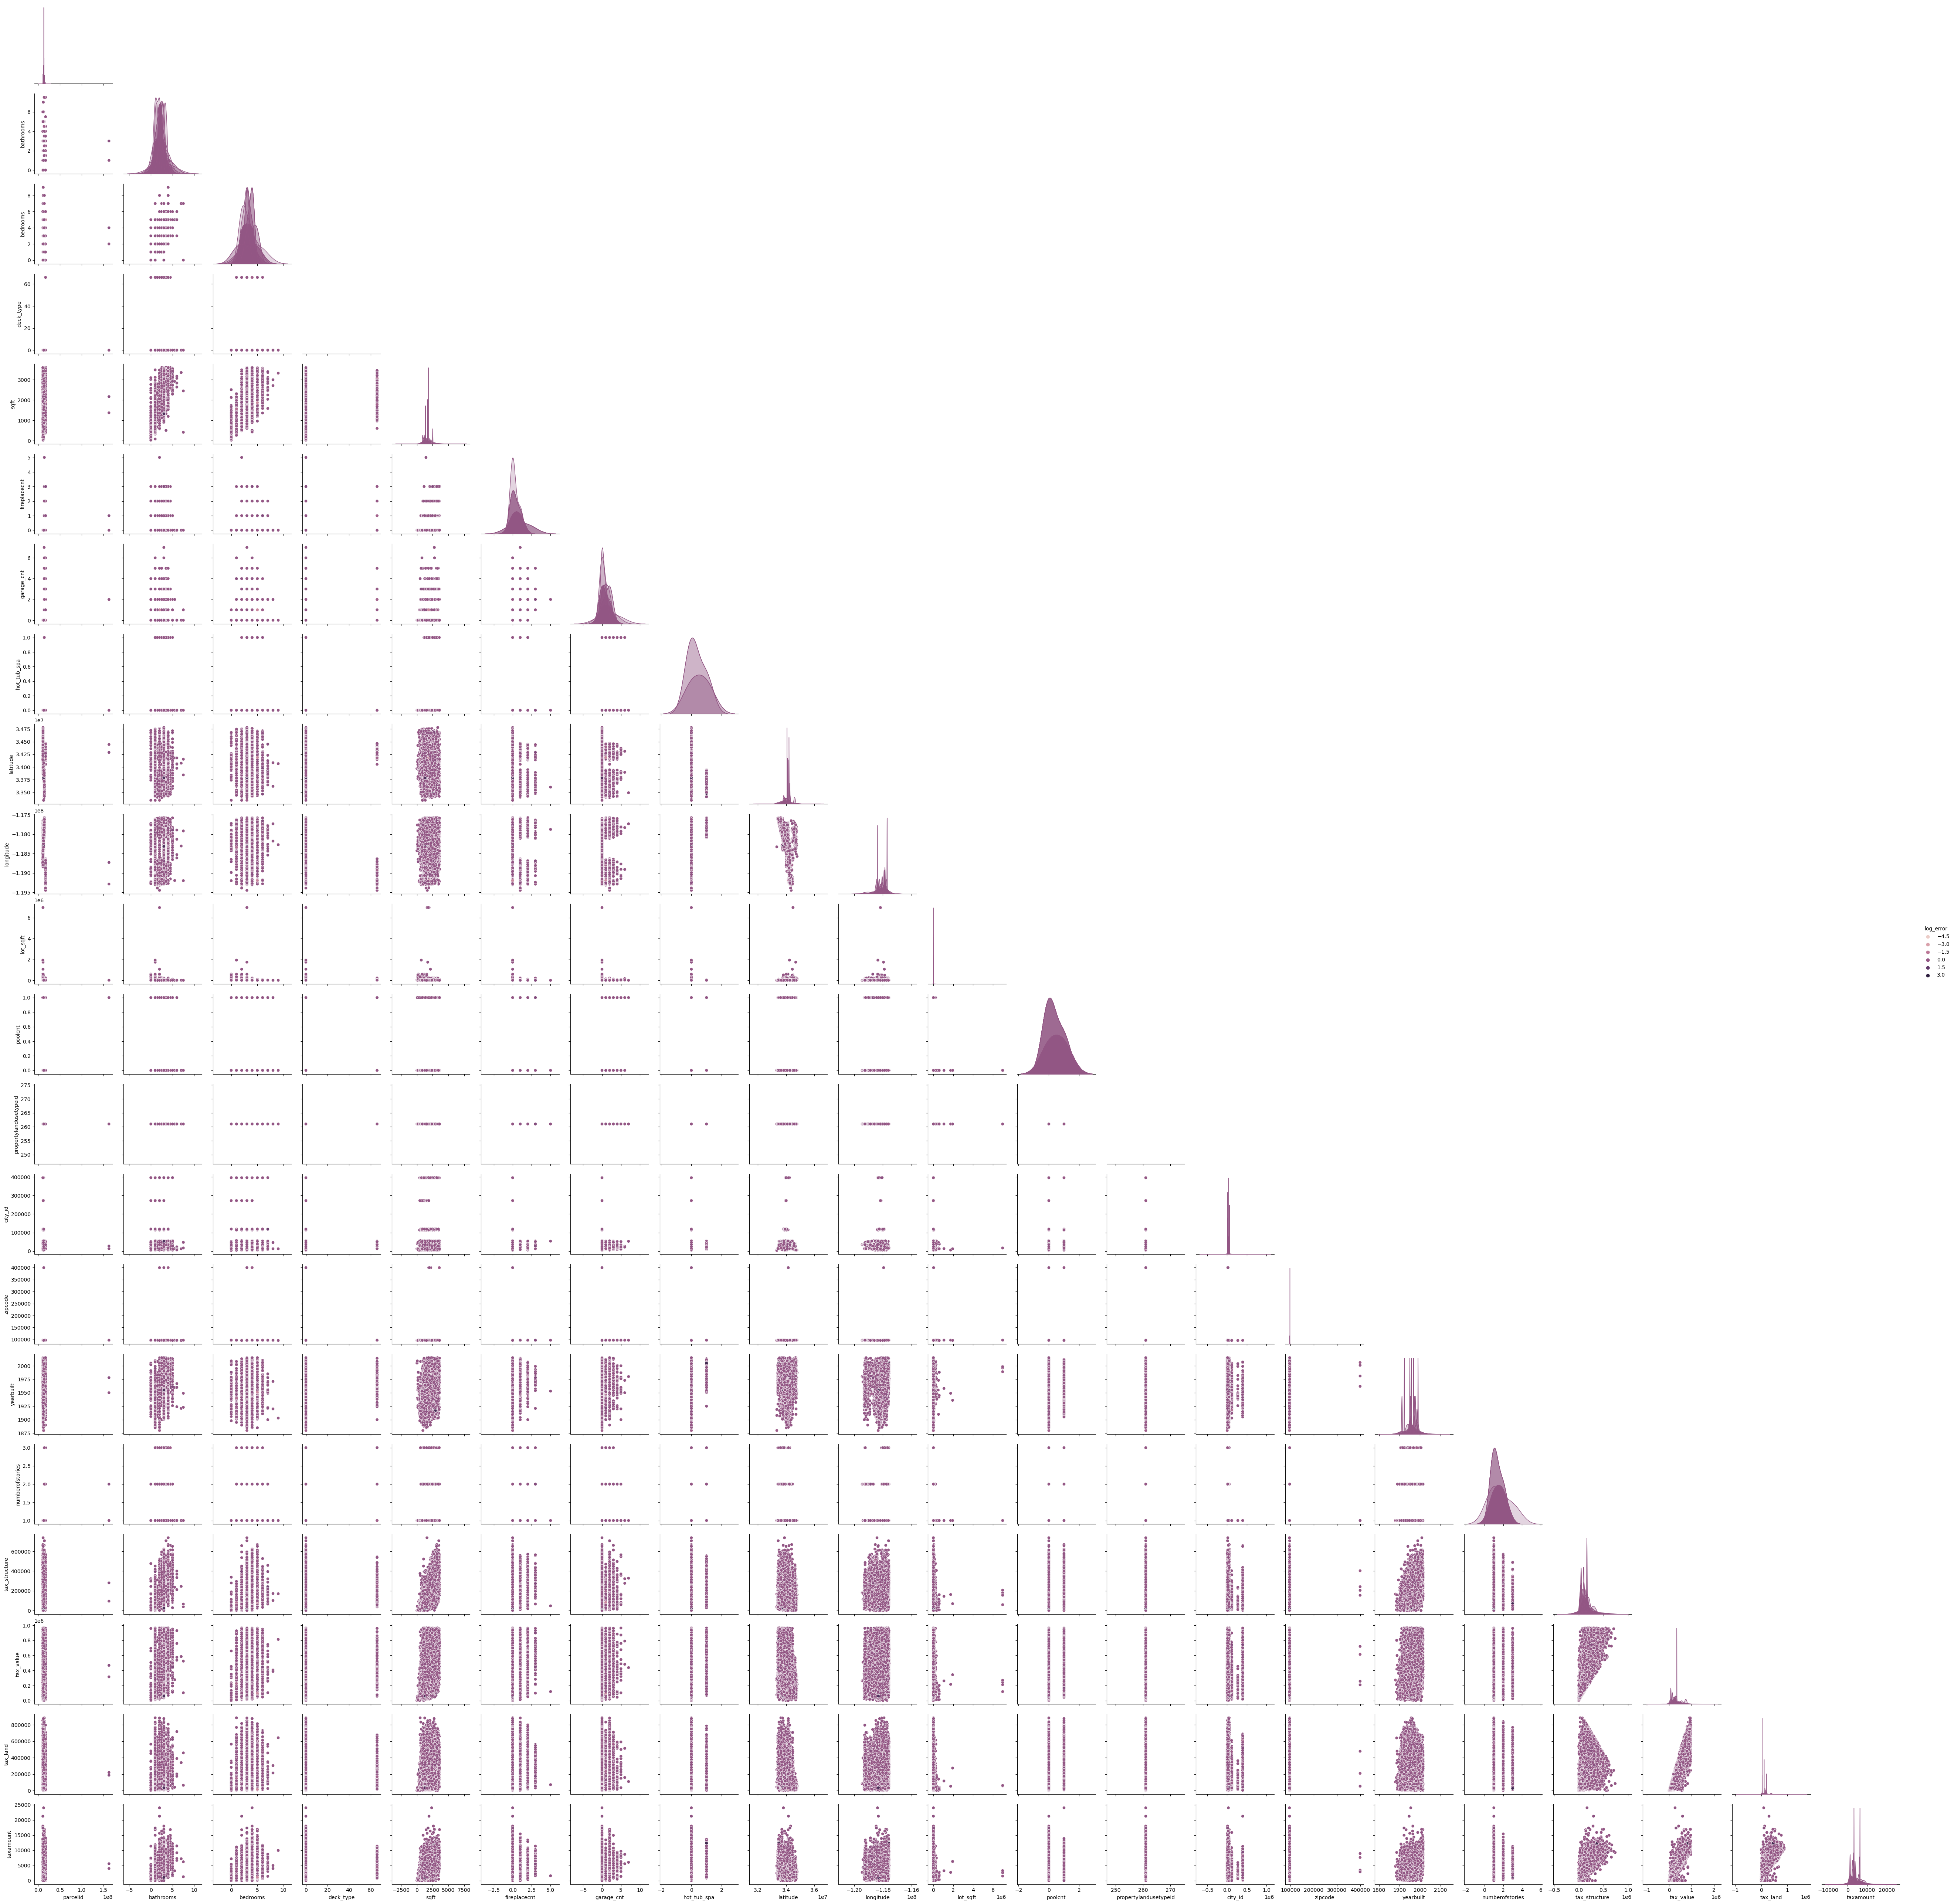

In [18]:
# present a box plot of the information
# (gives good info about where outliers sit)
sns.pairplot(data=train, corner=True, hue='log_error')
plt.show()

Q1. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

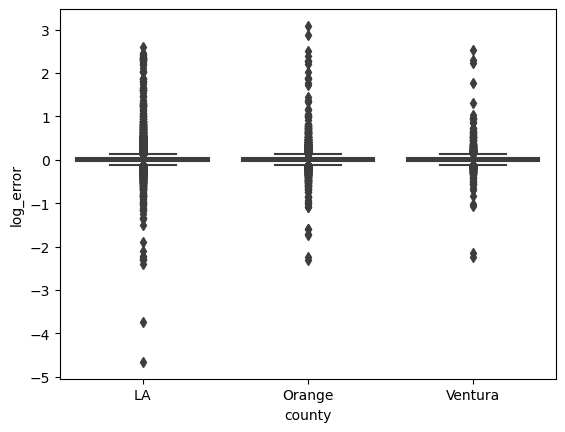

In [19]:
sns.boxplot(data=train, x='county', y='log_error')
plt.show()

<Axes: xlabel='county', ylabel='log_error'>

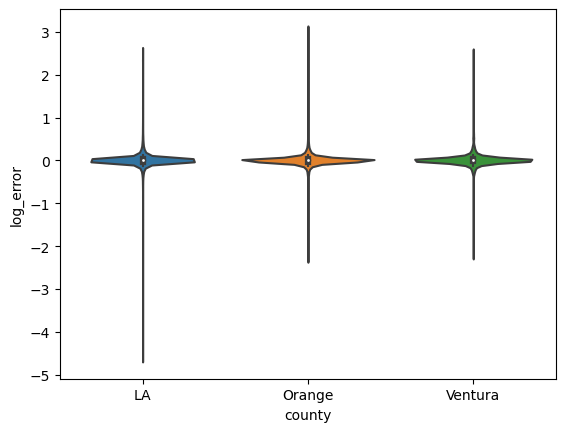

In [20]:
sns.violinplot(data=train, x='county', y='log_error')

LA has a larger margin of log_error, but the average error is very similar between all 3 counties

Q2. Is logerror significantly different for yearbuilt?

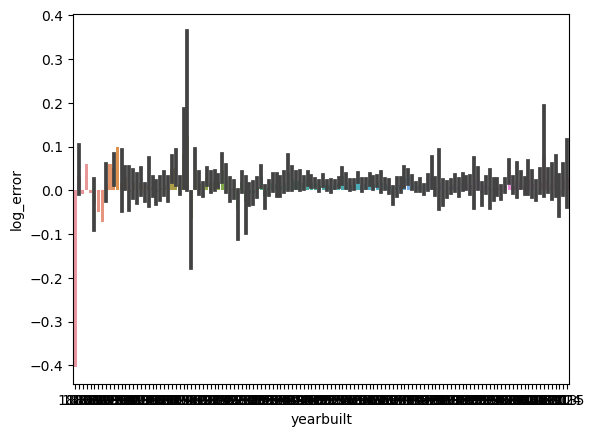

In [50]:
sns.barplot(data=train, x='yearbuilt', y='log_error')
plt.show()

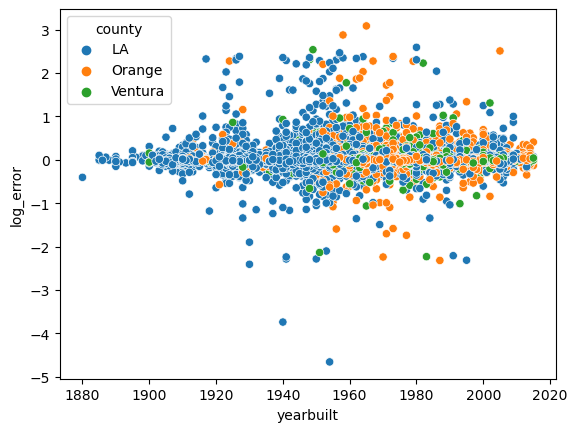

In [45]:
sns.scatterplot(data=train, x='yearbuilt', y='log_error', hue='county')
plt.show()

log_error seemes to spread more after yearbuilt 1910 and diminish after the 2000s

Q3. Is logerror significantly different for properties in different zipcodes?

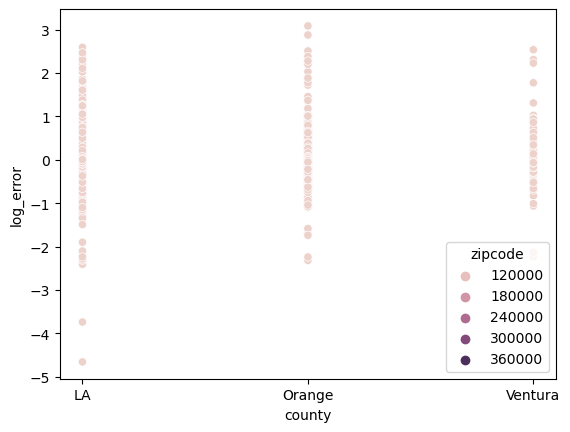

In [40]:
sns.scatterplot(data=train, x='county', y='log_error', hue='zipcode')
plt.show()

no visible difference between log_error in different zipcodes

Q4. Is logerror significantly different for properties with higher sqft?

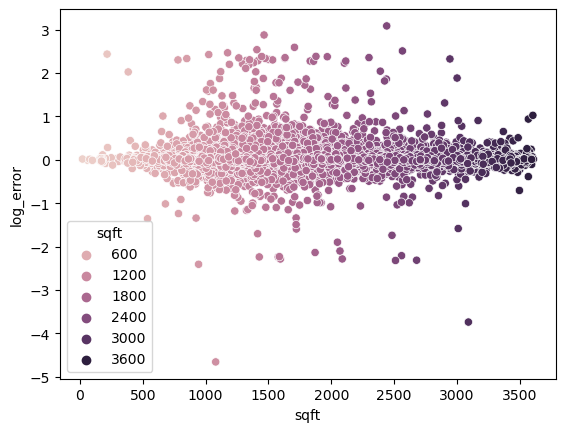

In [53]:
sns.scatterplot(data=train, x='sqft', y='log_error', hue='sqft')
plt.show()

no visible difference in log_error in homes with larger sqft

Q5. Is logerror significantly different for properties with higher tax_value?

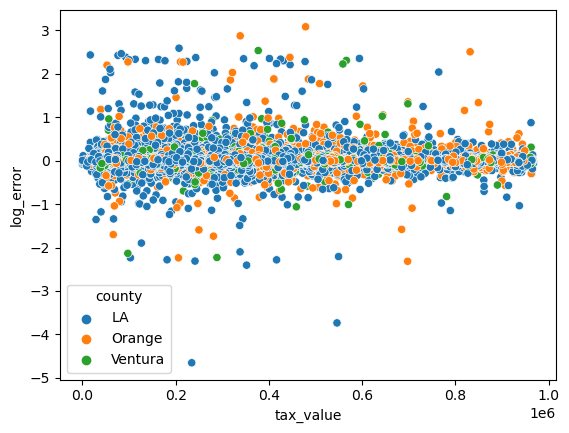

In [54]:
sns.scatterplot(data=train, x='tax_value', y='log_error', hue='county')
plt.show()

log_error seems to lower as tx_value increases.

Answer those questions through a mix of statistical tests and visualizations.

LA has a larger margin of log_error, but the average error is very similar between all 3 counties

log_error seemes to spread more after yearbuilt 1910 and diminish after the 2000s

no visible difference between log_error in different zipcodes

no visible difference in log_error in homes with larger sqft

log_error seems to lower as tx_value increases.